<a href="https://colab.research.google.com/github/feiduobaby/good-first-issue/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2 Machine Learning For Regression

In [67]:
import pandas as pd
import numpy as np

2.2 Data preparation

In [68]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-12 11:41:06--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.02s   

2025-10-12 11:41:07 (37.4 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [69]:
df = pd.read_csv('car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [70]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [71]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['origin', 'fuel_type', 'drivetrain']

In [72]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [73]:
df.dtypes

,0
engine_displacement,int64
num_cylinders,float64
horsepower,float64
vehicle_weight,float64
acceleration,float64
model_year,int64
origin,object
fuel_type,object
drivetrain,object
num_doors,float64


2.3 Exploratory data analysis

In [74]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

num_cylinders
[ 3.  5. nan  4.  1.]
14

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

acceleration
[17.7 17.8 15.1 20.2 14.4]
162

model_year
[2003 2007 2018 2009 2008]
24

origin
['europe' 'usa' 'asia']
3

fuel_type
['gasoline' 'diesel']
2

drivetrain
['all-wheel_drive' 'front-wheel_drive']
2

num_doors
[ 0.  2. -1.  1. nan]
9

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



In [75]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [76]:
df.columns[df.isnull().any()]

Index(['horsepower'], dtype='object')

In [77]:
df['horsepower'].median()

149.0

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

2.3 setting up the validation work

In [79]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
n

9704

In [80]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [81]:
df.iloc[[10, 0, 3, 5]]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
10,230,100.0,3111.810181,2014,13.386605
0,170,159.0,3413.433759,2003,13.231729
3,220,NaN,2542.392402,2009,16.912736
5,190,NaN,2484.883986,2008,17.271818


In [82]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [417]:
idx = np.arange(n)
#np.random.seed(42)
#np.random.seed(0)
#np.random.seed(1)
#np.random.seed(2)
#np.random.seed(3)
#np.random.seed(4)
#np.random.seed(5)
#np.random.seed(6)
#np.random.seed(7)
#np.random.seed(8)
np.random.seed(9)

np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
9066,240,136.0,4050.512290,2006,10.304700
3073,190,141.0,3195.866942,2017,13.479434
2476,200,184.0,3006.164370,2017,16.190653
658,200,NaN,2947.143980,2022,15.446503
954,250,132.0,3114.371978,2001,14.472172


In [418]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [419]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
len(y_train)

5824

In [420]:
df_train.iloc[10]

,10
engine_displacement,130.000000
horsepower,NaN
vehicle_weight,2087.192105
model_year,2008.000000


In [421]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
linear_regression(xi)

12.312

In [422]:
np.expm1(12.312)

np.float64(222347.2221101062)

In [423]:
np.log1p(222347.2221101062)

np.float64(12.312)

In [424]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res
def linear_regression(xi):
    return w0 + dot(xi, w)
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [425]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)
linear_regression(xi)

12.312

In [426]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [427]:
def linear_regression(X):
    return X.dot(w_new)
linear_regression(X)

array([12.38 , 13.552, 12.312])

In [428]:
def train_linear_regression(X, y):
    pass
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [429]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [430]:
X = np.column_stack([ones, X])
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)


w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [431]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


In [432]:
df_train.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year'], dtype='object')

In [433]:
base = ['horsepower']

X_train = df_train[base].fillna(0).values

#mean = df['horsepower'].mean()
#X_train = df_train[base].fillna(mean).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [434]:
w0

np.float64(2.724993308613303)

In [435]:
w

array([0.00025686])

<Axes: ylabel='Count'>

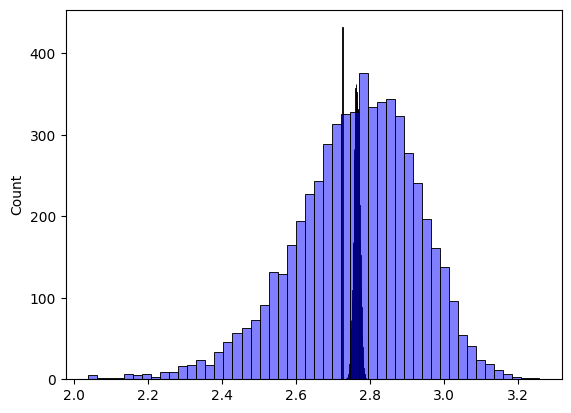

In [436]:

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

2.4 RMSE

In [437]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)
rmse(y_train, y_pred)

np.float64(0.16602034309370295)

2.5 Validation

In [438]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.16233137795056557)

In [465]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

np.float64(0.16624873866355852)

In [440]:
data = np.array([0.1618655382497401, 0.16467231356815218, 0.16423705986016388, 0.16571296659857226, 0.15978937606468224, 0.1605825180508445, 0.16368931507165232, 0.16168203415456792, 0.1660839425088436, 0.16233137795056557])
std_dev = np.std(data)
print(f"Standard deviation (population): {std_dev}")

Standard deviation (population): 0.0020311234174401104


In [439]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df['model_year']
    features = base + ['age']

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.16239360752884202)

In [441]:
data = np.array([0.16183101814937334, 0.1646910893816137, 0.16433245914994626, 0.1657044309099307, 0.15980110679250387, 0.16068122898695292, 0.16371941180287655, 0.16168664381576608, 0.16608170657117183, 0.16239360752884202])
std_dev = np.std(data)
print(f"Standard deviation (population): {std_dev}")

Standard deviation (population): 0.002023542919982202


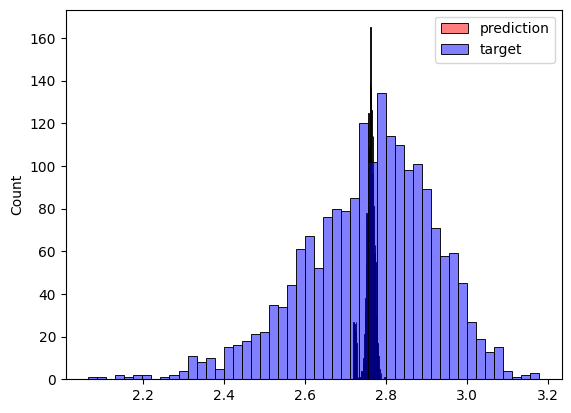

In [442]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

In [443]:
df_train.columns


Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year'], dtype='object')

In [444]:
df.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

2.7 Categorical Variables

In [445]:
categorical_columns = ['engine_displacement',
                       'horsepower','vehicle_weight',
                       'model_year']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df['model_year']
    features = base + ['age']


    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.16266257672964843)

In [466]:
categorical_columns = ['engine_displacement',
                       'horsepower','vehicle_weight',
                       'model_year']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df['model_year']
    features = base + ['age']


    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

np.float64(0.16603383435607627)

In [467]:
w0, w

(np.float64(2.7256733469493883),
 array([ 2.58474906e-04, -5.71570655e-04,  4.39107755e-03,  1.43274048e-02,
        -1.74661369e-03,  5.34922072e-03,  3.61095996e-03, -3.08383597e-02,
        -8.51691044e-03, -2.96439507e-02, -7.82498871e-03, -7.14638864e-03,
        -1.24838861e-01,  2.58655652e-01, -3.24315102e-02, -4.12287529e-02,
        -7.41504767e-02, -4.21859388e-03, -9.42543451e-03,  7.96954826e-03,
         2.82333926e-02,  4.55603122e-03]))

2.8 Regularization

In [468]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.000001],
]

X = np.array(X)
X

array([[4.      , 4.      , 4.      ],
       [3.      , 5.      , 5.      ],
       [5.      , 1.      , 1.      ],
       [5.      , 4.      , 4.      ],
       [7.      , 5.      , 5.      ],
       [4.      , 5.      , 5.000001]])

In [470]:
y= [1, 2, 3, 1, 2, 3]

In [471]:
XTX = X.T.dot(X)
XTX

array([[140.      , 111.      , 111.000004],
       [111.      , 108.      , 108.000005],
       [111.000004, 108.000005, 108.00001 ]])

In [472]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 4.13029882e-02, -6.18460955e+04,  6.18460502e+04],
       [-6.18460947e+04,  1.40737501e+12, -1.40737488e+12],
       [ 6.18460493e+04, -1.40737488e+12,  1.40737475e+12]])

In [473]:
XTX_inv.dot(X.T).dot(y)

array([ 4.14130492e-01, -1.76437236e+06,  1.76437228e+06])

In [474]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [475]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [476]:
XTX = XTX + 0.01 * np.eye(3)
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [455]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.16266237558739277)

In [477]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

np.float64(0.1660330929977178)

2.9 Turing the model

In [456]:
for r in [0.0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0.0 2.7256733469493883 0.16266257672964843
0.01 2.725621253063764 0.16266237558739277
0.1 2.7251521019656275 0.16266078198552095
1 2.7204515605479584 0.16265857672942557
5 2.699742626410249 0.162810727837544
10 2.6744137543079884 0.1633009873722628
100 2.300575330092819 0.20380088361940848


In [457]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.1626625563830708)

2.10 Using the model

In [458]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)
X_full_train

array([[136.,  11.,   0., ...,   0.,   0.,   0.],
       [141.,   0.,   1., ...,   0.,   0.,   0.],
       [184.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [154.,  -1.,   0., ...,   1.,   0.,   0.],
       [152.,  -3.,   0., ...,   0.,   0.,   0.],
       [174.,   6.,   0., ...,   0.,   0.,   0.]])

In [459]:
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.1660108753655645)

In [460]:
car = df_test.iloc[20].to_dict()
car

{'engine_displacement': 200.0,
 'horsepower': 148.0,
 'vehicle_weight': 3396.347127617343,
 'model_year': 2006.0}

In [461]:
df_small = pd.DataFrame([car])
df_small

,engine_displacement,horsepower,vehicle_weight,model_year
0,200.0,148.0,3396.347128,2006.0


In [462]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(2.768686728384888)

In [463]:
np.expm1(y_pred)

np.float64(14.937689744497748)

In [464]:
np.expm1(y_test[20])

np.float64(13.400912180178452)